## Binary Classification: Dogs vs. Cats
https://www.kaggle.com/c/dogs-vs-cats/data

** Dataset Information: **

- 25,000 images of dogs and cats

** Attribute Information: **

- color images of dogs and cats

** Objective of this project **

- distinguish dogs from cats

## Data

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
%matplotlib inline

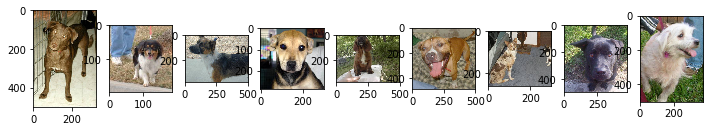

In [28]:
# plot the first 9 dogs
plt.figure(figsize=(12,6))
for i in range(0, 9):
    plt.subplot(190 + (i+1))
    plt.imshow(image.load_img('train_set/dogs/dog.'+str(i+1)+'.jpg'))

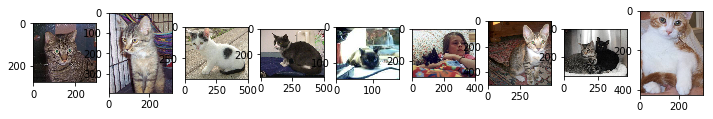

In [29]:
# plot the first 9 cats
plt.figure(figsize=(12,6))
for i in range(0, 9):
    plt.subplot(190 + (i+1))
    plt.imshow(image.load_img('train_set/cats/cat.'+str(i+1)+'.jpg'))

## Data preprocessing

In [30]:
# Generate minibatches of image data with real-time data augmentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# read image data
train_set = train_datagen.flow_from_directory('train_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [39]:
train_set.class_indices

{'cats': 0, 'dogs': 1}

In [41]:
train_set.data_format

'channels_last'

In [44]:
train_set.image_shape

(64, 64, 3)

## CNN

#### Train and Evaluate the Network

In [37]:
# import libraries
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
import keras.backend as K

seed = 101
np.random.seed(seed)
K.clear_session()

# create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
# compile
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

In [62]:
# train the model
model.fit_generator(training_set, steps_per_epoch = 250, epochs = 10, 
                    validation_data = test_set, validation_steps = 62)

Epoch 1/10
250/250 [==============================] - 92s 368ms/step - loss: 0.3039 - acc: 0.8707 - val_loss: 0.4651 - val_acc: 0.7989
Epoch 2/10
250/250 [==============================] - 98s 391ms/step - loss: 0.2980 - acc: 0.8696 - val_loss: 0.4467 - val_acc: 0.8065
Epoch 3/10
250/250 [==============================] - 100s 399ms/step - loss: 0.2907 - acc: 0.8712 - val_loss: 0.4597 - val_acc: 0.8090
Epoch 4/10
250/250 [==============================] - 102s 407ms/step - loss: 0.2747 - acc: 0.8848 - val_loss: 0.4849 - val_acc: 0.7994
Epoch 5/10
250/250 [==============================] - 100s 402ms/step - loss: 0.2704 - acc: 0.8890 - val_loss: 0.4727 - val_acc: 0.8054
Epoch 6/10
250/250 [==============================] - 100s 400ms/step - loss: 0.2471 - acc: 0.8944 - val_loss: 0.4441 - val_acc: 0.8216
Epoch 7/10
250/250 [==============================] - 103s 411ms/step - loss: 0.2382 - acc: 0.9001 - val_loss: 0.6242 - val_acc: 0.7792
Epoch 8/10
250/250 [==============================

#### Predict new images

In [58]:
def dog_or_cat(filename):    
    test_image = image.load_img('prediction/'+filename, target_size = (64, 64))
    plt.imshow(test_image)
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    if result[0][0] == 1:
        return 'dog'
    else:
        return 'cat'

'dog'

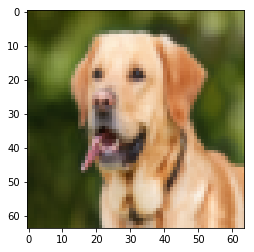

In [63]:
dog_or_cat('cat_or_dog_1.jpg')

'cat'

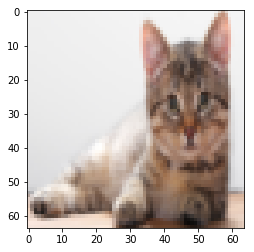

In [64]:
dog_or_cat('cat_or_dog_2.jpg')